# **Capstone project: Providing data-driven suggestions for HR**

# **PACE stages**


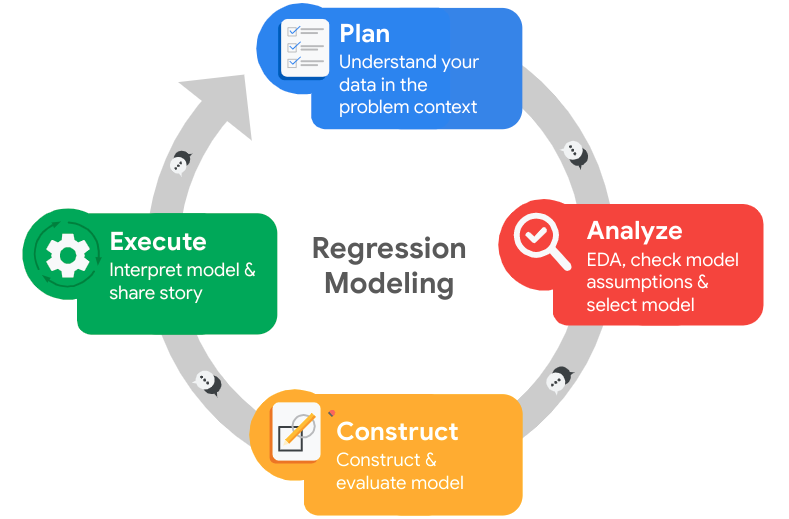

## **Pace: Plan**

### Understanding the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, and what to know the answer to the question what’s likely to make the employee leave the company?

The goal in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

### Familiarize yourself with the HR dataset

The dataset contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe

df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understanding variables
- Cleaning dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data

df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed

df0 = df0.rename(columns={'Work_accident':'work_accident',
                          'average_montly_hours':'average_monthly_hours',
                          'Department':'department',
                          'time_spend_company':'tenure'})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df0.drop_duplicates(keep='first')


# Display first few rows of new dataframe as needed
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

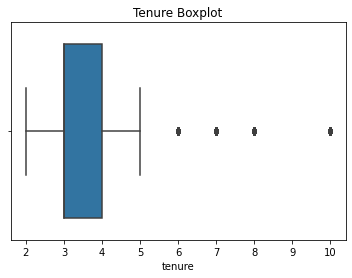

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.title('Tenure Boxplot', fontsize=12)
sns.boxplot(x=df['tenure'])
plt.show()

In [12]:
# Determine the number of rows containing outliers

#25th&75th percentile
percentile25 = df['tenure'].quantile(0.25)
percentile75 = df['tenure'].quantile(0.75)

#interquartile range 
iqr = percentile75-percentile25

#upper&lower limit for outlier
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

#data containing outliers
outliers = df[(df['tenure']>upper_limit)| (df['tenure']<lower_limit)]

print("row with tenure outliers:",len(outliers))

row with tenure outliers: 824


Depending on the model to be built in the construct phase we will determine to keep the outliers, modify or remove the outlier rows.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# people who left vs. stayed
print(df['left'].value_counts())


# % of people who left vs. stayed
print(df['left'].value_counts(normalize=True)*100)

0    10000
1     1991
Name: left, dtype: int64
0    83.39588
1    16.60412
Name: left, dtype: float64


We have more observations of employees who have stayed in the organization then left, this can be an class imbalance issue and should be handeled before we get to our construct phase of building the prediction model.

### Data visualizations

Creating plots to visualize relationships between variables in the data.

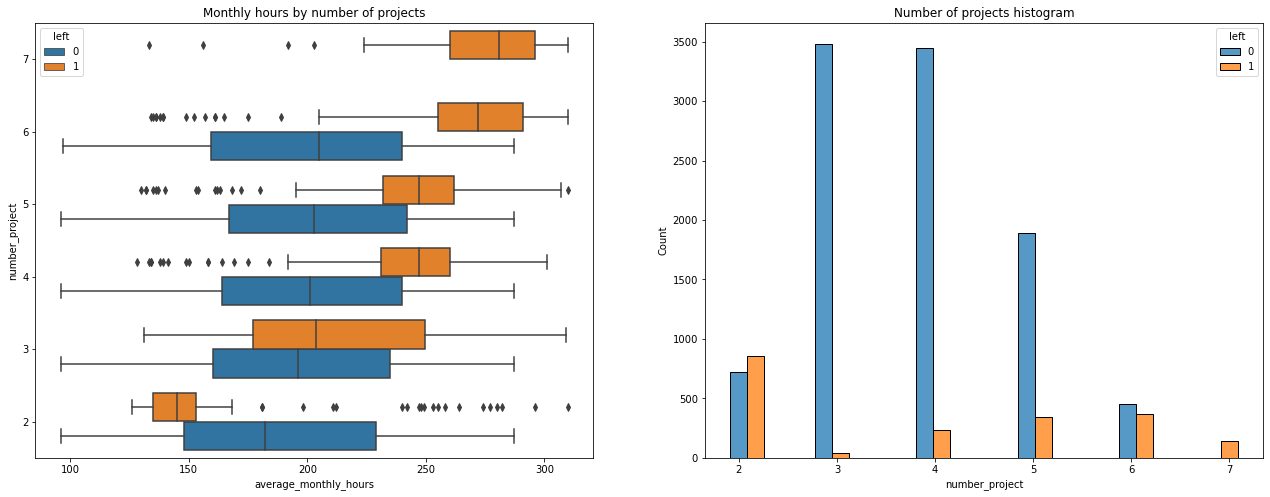

In [14]:
#To see how the working hours and the projects differ in the two groups 

fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df, x='average_monthly_hours', y='number_project',hue='left',orient="h",ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df[df['left']==0]['number_project']
tenure_left = df[df['left']==1]['number_project']
sns.histplot(data=df, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram')

# Display the plots
plt.show()


* From the boxplot we can see the people who have left the organization have either worked less than the person who stayed for the same amount of the projects or worked very long hours
* With the group who have left we observe more outliers i.e they are working more/less hours compared to thier peers in the same bucket can be due to performance issues or organizational issues 
* Most of the people who have left have less projects to them or more projects to them; Most of the people who have stayed have an avergae of 4 projects 
* All the people who worked 7 projects left; can be due to the long hours and overwork 

With these two points we observe two groups of people who left; people who work less then the average person and who work more then the average person

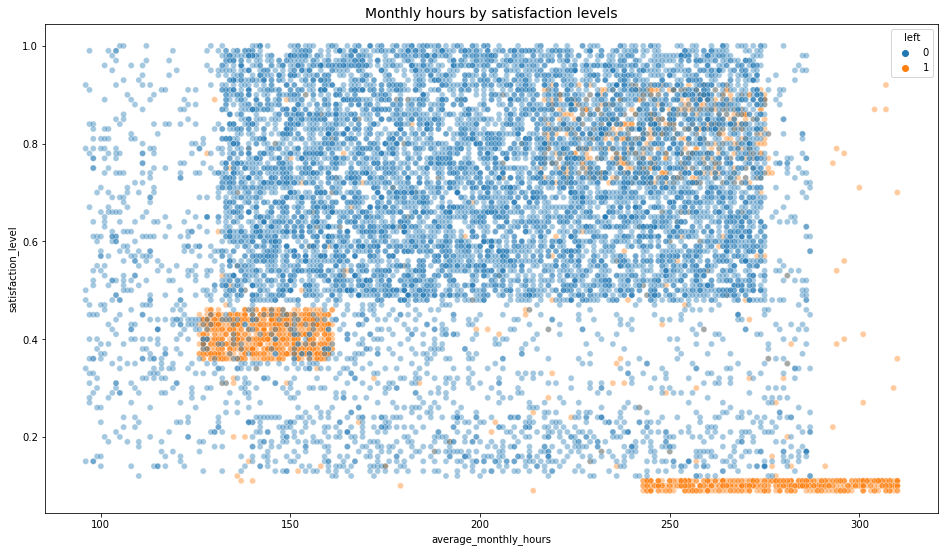

In [15]:
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)

plt.title('Monthly hours by satisfaction levels', fontsize='14');

Same as before we can again observe two type of groups who have left, one having more than the average working hours and very low satisfaction levels and other group working belwo the average working hours of the others in the company

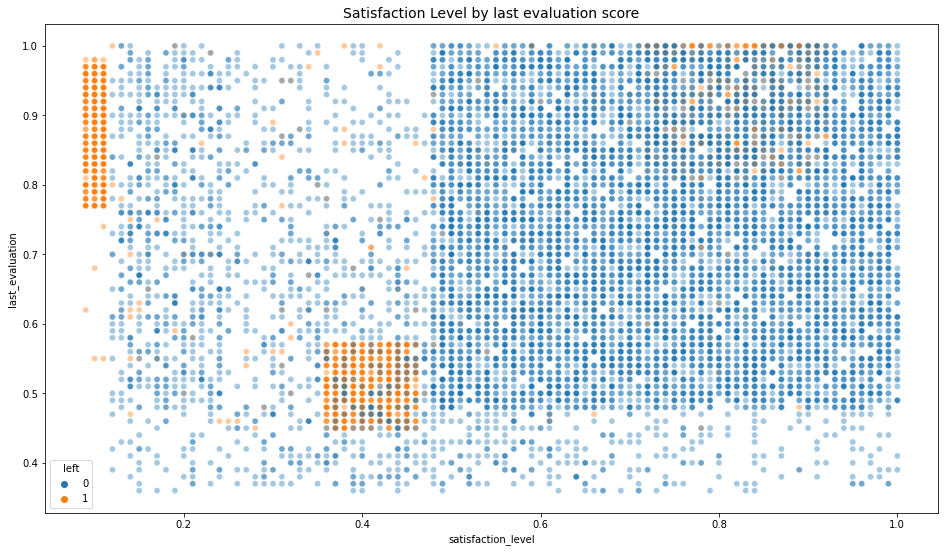

In [16]:
# Create scatterplot of `last_evaluation` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x='satisfaction_level', y='last_evaluation', hue='left', alpha=0.4)

plt.title('Satisfaction Level by last evaluation score', fontsize='14');

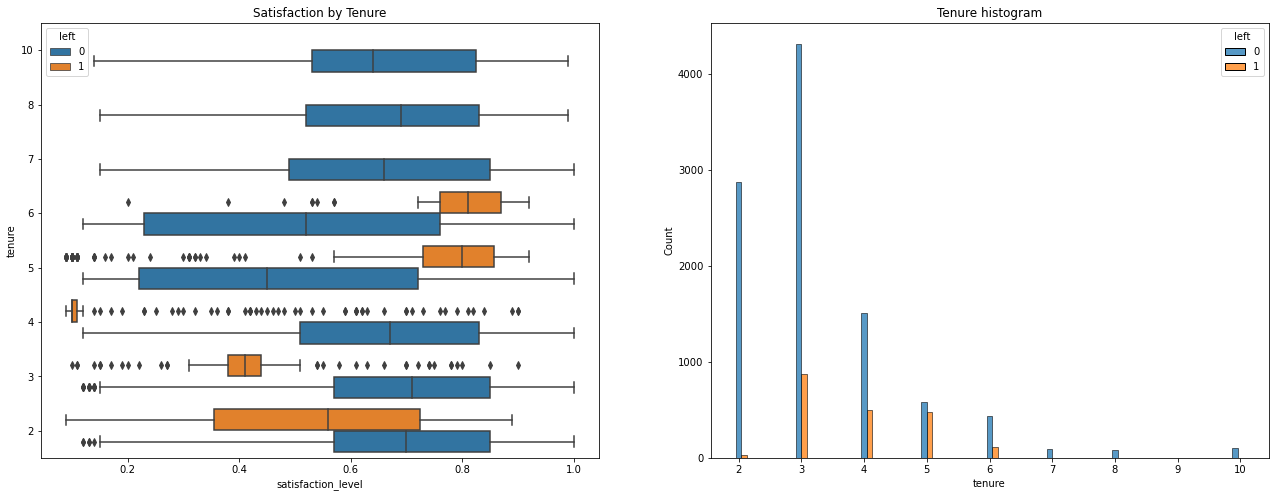

In [17]:
#To see how the satisfaction levels and tenure in the two groups 

fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df, x='satisfaction_level', y='tenure',hue='left',orient="h",ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by Tenure')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df[df['left']==0]['tenure']
tenure_left = df[df['left']==1]['tenure']
sns.histplot(data=df, x='tenure', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Tenure histogram')

# Display the plots
plt.show()


* We can also observe two groups in the people who left, people with short tenure with low satisfaction levels and meduim length tenure and good satisfaction levels.
* But there is another group of people who left with very low satisfaction levels and a tenure of about 4 years - this should investigated further in the people with 4 year tenure 
* The long tenure employess dont leave and have good staisfaction levels same as the short tenure people who stayed 

The histogram shows they are very few people who have long tenure of 8-10 years these can be people with high positions and pay grade 


In [18]:
# mean and median of the staisfaction levels of the two groups 
df.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


In [19]:
# mean and median of the stenure of the two groups 
df.groupby(['left'])['tenure'].agg([np.mean,np.median])

,mean,median
left,,
0,3.262000,3.0
1,3.881467,4.0


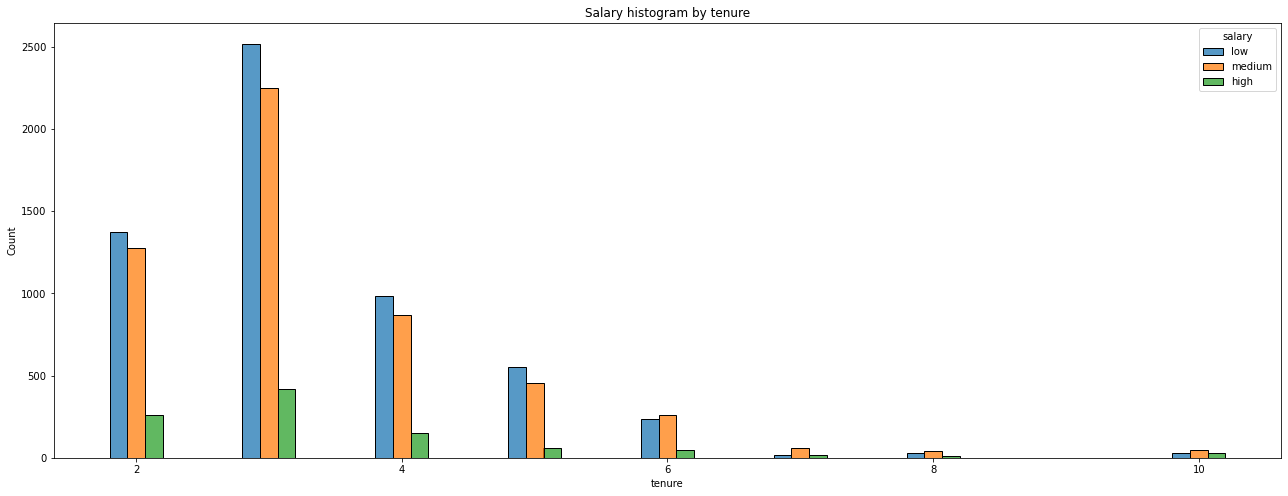

In [20]:
# Salry distibution of the two groups

plt.figure(figsize = (22,8))


sns.histplot(data=df, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4)
plt.title('Salary histogram by tenure');

plt.show()

There is no disruption in pay and employees who have high tenure are not paid disproportionately high saliries 

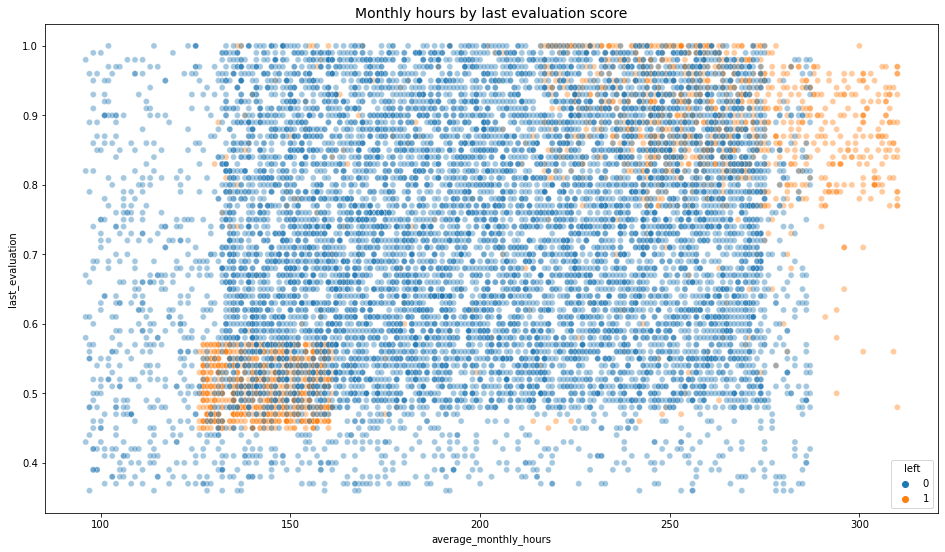

In [21]:
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)

plt.title('Monthly hours by last evaluation score', fontsize='14');


We see the two groups in the people who left, they are either who are overworked with high evaluation scores and people who worked a little less than the average employee and with low evluation scores.

There are poeple who worked long hours but still recived low scores - working long hours dosent guarantee good evaluation score 

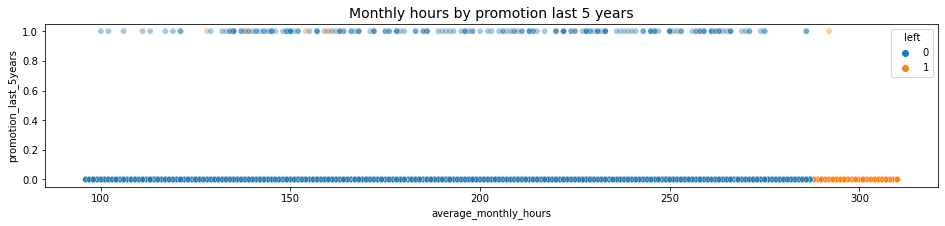

In [22]:
# `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

* Very few people were promoted in last 5 years 
* It can be lack of recognisation and promotion even though working very long hours drove the poeple to leave the organization 

In [23]:
# distirbution of people  by department 
df['department'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

In [24]:
# distirbution of people who left by department 
df.groupby(['department'])['left'].agg([np.sum])

,sum
department,
IT,158
RandD,85
accounting,109
hr,113
management,52
marketing,112
product_mng,110
sales,550
support,312


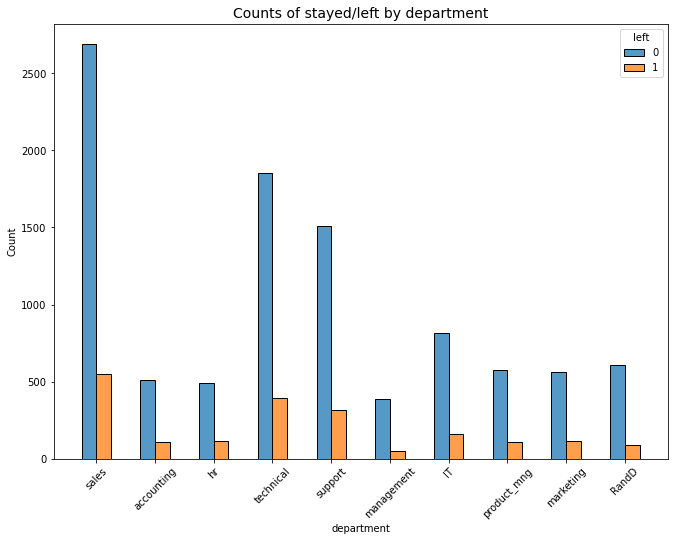

In [25]:
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data=df, x='department', hue='left', discrete=1, 
         multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=14);

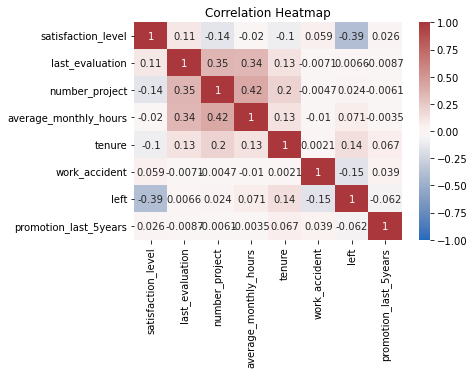

In [26]:
# Plot a correlation heatmap

sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
plt.title('Correlation Heatmap');

last_evaluation,number_projects,avergae_monthly_hours seem to be positively correlated and satisfaction_level is negatively correlated to whether a emplyee leaves or not

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


## Step 3. Model Building, Step 4. Results and Evaluation

The prediction task to predict whether the emplyee will leave or not which is a categorical variable so we can use a logistic regression model or a variation of tree models 

### Modeling - Logistic Regsression Model

convert categorical variables  - we have department and salary(ordinal as the order has some meaning to it)

In [27]:
# Copy the dataframe
df_enc = df.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


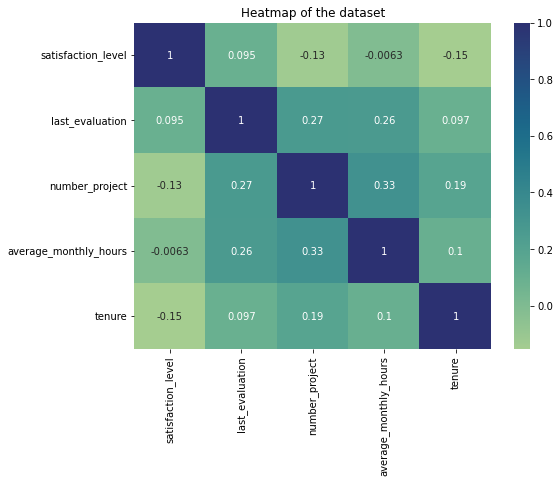

In [28]:
# Create a heatmap to visualize how correlated variables from the previous step are 
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

In [29]:
# removing the outliers identified before as logistic regression is sensitive to outliers 
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [30]:
# logistic regression 

y = df_logreg['left']
X = df_logreg.drop('left',axis=1)

# split into train and test datasets

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,stratify = y, random_state = 123)

In [31]:
log_clf = LogisticRegression(random_state = 123, max_iter = 500).fit(X_train,y_train)

y_pred = log_clf.predict(X_test)

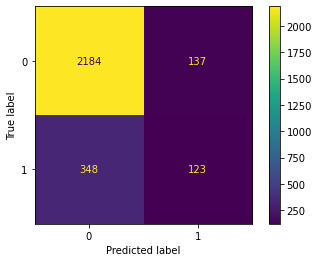

In [32]:
#model evaluation 

log_cm = confusion_matrix(y_test,y_pred,labels=log_clf.classes_)


log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

log_disp.plot(values_format='')

plt.show()

In [33]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.94      0.90      2321
    Predicted would leave       0.47      0.26      0.34       471

                 accuracy                           0.83      2792
                macro avg       0.67      0.60      0.62      2792
             weighted avg       0.80      0.83      0.80      2792



### Tree-based Model 

In [34]:
#Test/train split

y = df_enc['left']
X = df_enc.drop('left',axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, stratify=y,random_state = 1)

# Decision tree

tree = DecisionTreeClassifier(random_state=1)

# search for hyperparameters

cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [35]:
tree1.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [36]:
# Check best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [37]:
# Check best AUC score on CV
tree1.best_score_

0.9702105365275526

In [38]:
def make_results(model_name:str, model_object, metric:str):

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [39]:
# Get all CV scores - best scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.922184,0.912908,0.917481,0.972756,0.970211


### Random Forest 


In [40]:
#random forest 
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [41]:
rf1.fit(X_train, y_train)

#best parameters
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [42]:
#best auc score
rf1.best_score_

0.9800116547910902

In [43]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.922184  0.912908  0.917481  0.972756  0.970211
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.951696  0.910897  0.930752  0.977538  0.980012


* Random forest is a better model than decision tree 
as decision tree tend to overfit 


In [44]:
#scores on test data
def get_scores(model_name:str, model, X_test_data, y_test_data):
    
    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [45]:
# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.958848,0.935743,0.947154,0.982655,0.963871


In [46]:
#important features in decision tree 
tree1_importances = pd.DataFrame(tree1.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree1_importances = tree1_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree1_importances = tree1_importances[tree1_importances['gini_importance'] != 0]
tree1_importances

,gini_importance
satisfaction_level,0.514170
last_evaluation,0.174001
tenure,0.130617
number_project,0.126284
average_monthly_hours,0.054928


In [47]:
#important features in random forest 
rf1_importances = pd.DataFrame(rf1.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
rf1_importances = rf1_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
rf1_importances = rf1_importances[rf1_importances['gini_importance'] != 0]
rf1_importances

,gini_importance
satisfaction_level,0.476749
number_project,0.181274
last_evaluation,0.143429
tenure,0.123559
average_monthly_hours,0.073498
salary,0.000284
department_support,0.000251
department_technical,0.000164
department_IT,0.000155
department_RandD,0.000153


#### The top important features in both decision tree and random forest remain the same
* We can see satisfaction_level having a greater importance compared to the other top5 features in the models
* As satisfaction_level is an self evaluation metric and is the direct indicator of the employee staifaction levels and has very high prediction power of the emplyee leaving or staying in the company, this an have some negative impact on the prediction model 
* In these cases there is an high chance of model overfitting; model just memorizes the "satisfaction_levels" instead of learning meaningful patterns from it and this can lead to poor predictions in terms of new and unseen data


#### Feature Engineering
* to remove the self evaluation metric and highly correlated metrics - we can introducte a new categorical feature that determines whether the emplyee is overworked or not
* drop the satisfaction_level feature 

In [48]:
# Drop `satisfaction_level` and save resulting dataframe in new variable
df1 = df_enc.drop('satisfaction_level', axis=1)

# Display first few rows of new dataframe
df1.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [53]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df1['overworked'] = df1['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df1['overworked'].max())
print('Min hours:', df1['overworked'].min())

Max hours: 310
Min hours: 96


Considering the average working hours of 40hr/week, 52 weeks in a year with 2 weeks of vacation; the average monthly working hours is 166.67 hrs/month and taking into account that most emplyees are above this standars'let's consider anything above 175hr/month as overworked employee


In [54]:
# Define `overworked` as working > 175 hrs/week
df1['overworked'] = (df1['overworked'] > 175).astype(int)

# Display first few rows of new column
df1['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

In [55]:
# Drop the `average_monthly_hours` column
df1 = df1.drop('average_monthly_hours', axis=1)

# Display first few rows of resulting dataframe
df1.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [56]:
y = df1['left']

X = df1.drop('left', axis=1)

# Create test/train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

Decision Tree #2


In [57]:
#Decision tree with new features
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [58]:
tree2.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [59]:
# Check best params
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [60]:
# Check best AUC score on CV
tree2.best_score_

0.9586752505340426

In [61]:
# Get all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.922184  0.912908  0.917481  0.972756  0.970211
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675


Scores of the model fell given we have fewer features but still very good scires.



Random Forest #2


In [62]:

rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [63]:
rf2.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [64]:
# Check best params
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [65]:
# Check best AUC score on CV
rf2.best_score_

0.9648100662833985

In [67]:
# Comparing the models
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675
               model  precision    recall        F1  accuracy      auc
0  random forest2 cv   0.866758  0.878754  0.872407  0.957411  0.96481


The scores have fallen a bit, but considering AUC as the evluation metric out random forest model performs better than the decison tree.
we choos this model as our final model.



Checking how the model works on test data, the important features 


In [68]:
# Get predictions on test data
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest2 test,0.870406,0.903614,0.8867,0.961641,0.938407


In [69]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
last_evaluation,0.343958
number_project,0.343385
tenure,0.215681
overworked,0.093498
department_support,0.001142
salary,0.000910
department_sales,0.000607
department_technical,0.000418
work_accident,0.000183
department_IT,0.000139


# pacE: Execute Stage


## Evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






### Summary of model results

* Logistic Regression - precison of 80%, recall of 83%, f1-score of 80% and accuracy of 83% (weighted averages) socres.
* Tree based models - random forest model outperfomed the decison tree and achived an AUC of 93.8%, precison of 87%, recall of 90%, f1 score of 88.7% and accuracy of 96.2% on the test data.

### Conclusion

* according the important features in our top performing model; the company should pay attention to the workload of the employees
* put an cap to the number of projects they can take on in a time frame
* consider promoting employees who have been working for the last four years
* And also investigate about the disatisfaction of all the 4 year tenure employees
* As the last given evaluation scores hold the most power in the predicting and hence determing whether the employee stays or not - consider reforming the evaluation metrics and how employees are graded not just on working hours/projects
* Consider conducting company wide and within team discussions to improve culture 